Cluster centers:
[[-0.25350353  0.73376474]
 [-0.32234367 -0.31127803]
 [ 0.63348869 -0.08232679]
 [-0.00163643  0.17237573]
 [-0.50866689  0.01757356]]
Cluster sizes:
1    126
2     98
3     85
0     44
4     20
dtype: int64


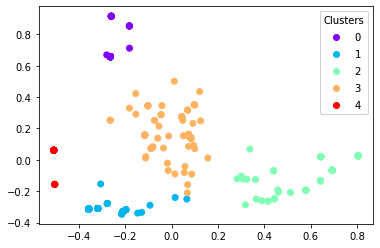

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Read the log file line by line and create a new unit every 8 lines
with open('Dataload_UW_dataset.log') as f:
    lines = f.readlines()
data = []
unit = []
for line in lines:
    if '-----' in line:
        if unit:
            data.append(unit)
            unit = []
    else:
        unit.append(line.strip())
if unit:
    data.append(unit)

# Extract the relevant information from each unit and join into a single string
data_str = []
for unit in data:
    dataload_target = ''
    software_part_number = ''
    dataload_protocol = ''
    features = ''
    for line in unit:
        if 'Features:' in line:
            features = line.split(':')[1].strip()
    unit_str = features
    data_str.append(unit_str)

# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
features_tfidf = vectorizer.fit_transform(data_str)

# Apply PCA to the TF-IDF features
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_tfidf.toarray())

# Scale the PCA-transformed features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_pca)

# Apply K-means clustering to the PCA-transformed features
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features_pca)

# Print the cluster centers
print('Cluster centers:')
print(kmeans.cluster_centers_)

# Assign cluster labels to each data point
labels = kmeans.labels_

# Print the number of data points in each cluster
print('Cluster sizes:')
print(pd.Series(labels).value_counts())

# Plot the clusters in 2D
fig, ax = plt.subplots()
scatter = ax.scatter(features_pca[:,0], features_pca[:,1], c=labels, cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.show()
